In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#import dataset from data.csv file
dataset = pd.read_csv('electricity_demand.csv')
dataset.head()

,date,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,1/1/2015,99635.030,25.633696,13.3,5.186521,0.000000,0.0,N,Y
1,1/2/2015,129606.010,33.138988,15.4,6.228965,0.880597,0.0,N,N
2,1/3/2015,142300.540,34.564855,20.0,6.180615,1.011321,0.0,N,N
3,1/4/2015,104330.715,25.005560,16.3,4.626013,1.051587,4.2,N,N
4,1/5/2015,118132.200,26.724176,15.0,4.690416,0.820847,0.0,N,N


In [3]:
#Dataset correlation matrix
corrmat = dataset.corr()
corrmat.style.background_gradient(cmap='Blues').set_precision(2)

,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall
demand,1.00,0.23,-0.15,-0.12,0.04,-0.07
RRP,0.23,1.00,0.06,0.13,-0.01,-0.03
min_temperature,-0.15,0.06,1.00,0.71,0.19,0.00
max_temperature,-0.12,0.13,0.71,1.00,0.05,-0.16
solar_exposure,0.04,-0.01,0.19,0.05,1.00,-0.02
rainfall,-0.07,-0.03,0.00,-0.16,-0.02,1.00


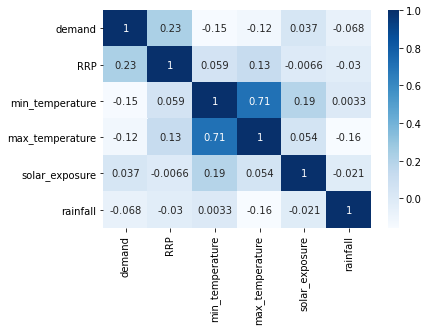

In [4]:
sns.heatmap(dataset.corr(), annot=True, cmap = 'Blues')
plt.show()

In [5]:
#Check for NA/Missing values
dataset.isnull().sum(axis = 0)

date               0
demand             0
RRP                0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

<AxesSubplot:xlabel='RRP'>

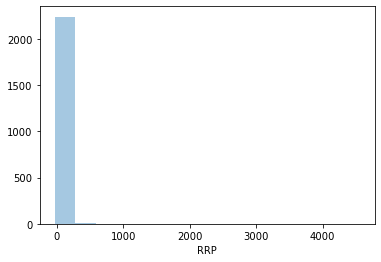

In [7]:
#Histogram of 'RRP'
sns.distplot(dataset.RRP.dropna(),kde = False, bins = 15)

In [8]:
#Only utilising the RRP variable 
dataset = dataset.dropna(subset=["RRP"])

dataset=dataset.reset_index(drop=True)
training_set = dataset.iloc[:,2:3].values
training_set

array([[25.63369643],
       [33.13898756],
       [34.56485483],
       ...,
       [25.79625   ],
       [29.89708333],
       [22.41291667]])

In [9]:
print(training_set.shape)

(2251, 1)


In [10]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
x_train = []
y_train = []

n_future = 59 # next 59 days (Jan 2021 - Feb 2021)
n_past = 2192 # Past 2192 days (Jan 2015 - Dec 2020)

for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    x_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
x_train , y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1) )

In [12]:
#Import relevant libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Define the layers in our RNN model and tune hyperparameters
rnn = Sequential()
rnn.add((LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30 , return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30 , return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = n_future,activation='linear'))

rnn.compile(optimizer='adam', loss='mean_absolute_error',metrics=['acc'])
rnn.fit(x_train, y_train, epochs=100, batch_size=32 )

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.0117 - acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 0.0087 - acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.0073 - acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.0059 - acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.0047 - acc: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 0.0038 - acc: 1.0000
Epoch 9/100
1/1 [==============================] - 3s 3s/step - loss: 0.0045 - acc: 1.0000
Epoch 10/100
1/1 [==============================] - 3s 3s/step - loss: 0.0029 - acc: 0.0000e+00
Epoch 11/100
1/1 [==============================] - 3s 3s

1/1 [==============================] - 3s 3s/step - loss: 5.9370e-04 - acc: 1.0000
Epoch 87/100
1/1 [==============================] - 3s 3s/step - loss: 5.4510e-04 - acc: 1.0000
Epoch 88/100
1/1 [==============================] - 3s 3s/step - loss: 7.0608e-04 - acc: 1.0000
Epoch 89/100
1/1 [==============================] - 3s 3s/step - loss: 5.5048e-04 - acc: 0.0000e+00
Epoch 90/100
1/1 [==============================] - 3s 3s/step - loss: 5.0431e-04 - acc: 0.0000e+00
Epoch 91/100
1/1 [==============================] - 3s 3s/step - loss: 4.9726e-04 - acc: 0.0000e+00
Epoch 92/100
1/1 [==============================] - 3s 3s/step - loss: 6.0371e-04 - acc: 0.0000e+00
Epoch 93/100
1/1 [==============================] - 3s 3s/step - loss: 5.4847e-04 - acc: 1.0000
Epoch 94/100
1/1 [==============================] - 3s 3s/step - loss: 4.0104e-04 - acc: 1.0000
Epoch 95/100
1/1 [==============================] - 3s 3s/step - loss: 3.7166e-04 - acc: 1.0000
Epoch 96/100
1/1 [===================

In [25]:
# Define the layers in our RNN model and increase epochs from 100 to 500
rnn = Sequential()
rnn.add((LSTM(units=30, return_sequences=True, input_shape = (x_train.shape[1],1) ) ))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30 , return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30 , return_sequences=True))
rnn.add(Dropout(0.2))

rnn.add(LSTM(units= 30))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = n_future,activation='linear'))

rnn.compile(optimizer='adam', loss='mean_absolute_error',metrics=['acc'])
rnn.fit(x_train, y_train, epochs=500, batch_size=32 )

Epoch 1/500
1/1 [==============================] - 9s 9s/step - loss: 0.0116 - acc: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 3s 3s/step - loss: 0.0097 - acc: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 3s 3s/step - loss: 0.0083 - acc: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 3s 3s/step - loss: 0.0073 - acc: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 3s 3s/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 0.0057 - acc: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 3s 3s/step - loss: 0.0052 - acc: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 3s 3s/step - loss: 0.0047 - acc: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 3s 3s/step - loss: 0.0041 - acc: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 3s 3s/step - loss: 0.0041 - acc: 0.0000e+00
Epoch 11/500
1/1 [==============================]

1/1 [==============================] - 4s 4s/step - loss: 5.8785e-04 - acc: 1.0000
Epoch 86/500
1/1 [==============================] - 3s 3s/step - loss: 6.5759e-04 - acc: 0.0000e+00
Epoch 87/500
1/1 [==============================] - 3s 3s/step - loss: 5.5127e-04 - acc: 0.0000e+00
Epoch 88/500
1/1 [==============================] - 3s 3s/step - loss: 6.3401e-04 - acc: 0.0000e+00
Epoch 89/500
1/1 [==============================] - 4s 4s/step - loss: 5.2102e-04 - acc: 0.0000e+00
Epoch 90/500
1/1 [==============================] - 3s 3s/step - loss: 6.6537e-04 - acc: 0.0000e+00
Epoch 91/500
1/1 [==============================] - 3s 3s/step - loss: 6.1777e-04 - acc: 1.0000
Epoch 92/500
1/1 [==============================] - 3s 3s/step - loss: 4.7285e-04 - acc: 1.0000
Epoch 93/500
1/1 [==============================] - 3s 3s/step - loss: 4.5650e-04 - acc: 0.0000e+00
Epoch 94/500
1/1 [==============================] - 3s 3s/step - loss: 5.9264e-04 - acc: 0.0000e+00
Epoch 95/500
1/1 [=======

1/1 [==============================] - 3s 3s/step - loss: 4.5517e-04 - acc: 0.0000e+00
Epoch 169/500
1/1 [==============================] - 3s 3s/step - loss: 5.4058e-04 - acc: 0.0000e+00
Epoch 170/500
1/1 [==============================] - 3s 3s/step - loss: 4.0588e-04 - acc: 0.0000e+00
Epoch 171/500
1/1 [==============================] - 3s 3s/step - loss: 4.4814e-04 - acc: 0.0000e+00
Epoch 172/500
1/1 [==============================] - 3s 3s/step - loss: 4.2140e-04 - acc: 1.0000
Epoch 173/500
1/1 [==============================] - 3s 3s/step - loss: 4.4782e-04 - acc: 1.0000
Epoch 174/500
1/1 [==============================] - 3s 3s/step - loss: 5.1209e-04 - acc: 1.0000
Epoch 175/500
1/1 [==============================] - 3s 3s/step - loss: 4.1900e-04 - acc: 1.0000
Epoch 176/500
1/1 [==============================] - 3s 3s/step - loss: 3.7984e-04 - acc: 1.0000
Epoch 177/500
1/1 [==============================] - 3s 3s/step - loss: 5.2356e-04 - acc: 1.0000
Epoch 178/500
1/1 [=========

1/1 [==============================] - 3s 3s/step - loss: 4.0703e-04 - acc: 1.0000
Epoch 252/500
1/1 [==============================] - 3s 3s/step - loss: 4.6000e-04 - acc: 1.0000
Epoch 253/500
1/1 [==============================] - 3s 3s/step - loss: 4.5389e-04 - acc: 1.0000
Epoch 254/500
1/1 [==============================] - 3s 3s/step - loss: 3.3409e-04 - acc: 1.0000
Epoch 255/500
1/1 [==============================] - 3s 3s/step - loss: 3.5135e-04 - acc: 1.0000
Epoch 256/500
1/1 [==============================] - 3s 3s/step - loss: 4.0083e-04 - acc: 0.0000e+00
Epoch 257/500
1/1 [==============================] - 3s 3s/step - loss: 4.6507e-04 - acc: 0.0000e+00
Epoch 258/500
1/1 [==============================] - 3s 3s/step - loss: 4.4388e-04 - acc: 0.0000e+00
Epoch 259/500
1/1 [==============================] - 3s 3s/step - loss: 5.3599e-04 - acc: 1.0000
Epoch 260/500
1/1 [==============================] - 3s 3s/step - loss: 4.8141e-04 - acc: 0.0000e+00
Epoch 261/500
1/1 [=========

1/1 [==============================] - 3s 3s/step - loss: 4.4086e-04 - acc: 0.0000e+00
Epoch 336/500
1/1 [==============================] - 3s 3s/step - loss: 3.8847e-04 - acc: 0.0000e+00
Epoch 337/500
1/1 [==============================] - 3s 3s/step - loss: 3.2141e-04 - acc: 1.0000
Epoch 338/500
1/1 [==============================] - 3s 3s/step - loss: 2.8789e-04 - acc: 0.0000e+00
Epoch 339/500
1/1 [==============================] - 3s 3s/step - loss: 3.3347e-04 - acc: 1.0000
Epoch 340/500
1/1 [==============================] - 3s 3s/step - loss: 3.6189e-04 - acc: 1.0000
Epoch 341/500
1/1 [==============================] - 3s 3s/step - loss: 3.1835e-04 - acc: 1.0000
Epoch 342/500
1/1 [==============================] - 3s 3s/step - loss: 3.7515e-04 - acc: 1.0000
Epoch 343/500
1/1 [==============================] - 3s 3s/step - loss: 4.7250e-04 - acc: 1.0000
Epoch 344/500
1/1 [==============================] - 3s 3s/step - loss: 4.4732e-04 - acc: 1.0000
Epoch 345/500
1/1 [=============

1/1 [==============================] - 3s 3s/step - loss: 3.7074e-04 - acc: 1.0000
Epoch 419/500
1/1 [==============================] - 3s 3s/step - loss: 3.9327e-04 - acc: 1.0000
Epoch 420/500
1/1 [==============================] - 3s 3s/step - loss: 4.0112e-04 - acc: 1.0000
Epoch 421/500
1/1 [==============================] - 3s 3s/step - loss: 4.6214e-04 - acc: 1.0000
Epoch 422/500
1/1 [==============================] - 3s 3s/step - loss: 3.5795e-04 - acc: 1.0000
Epoch 423/500
1/1 [==============================] - 3s 3s/step - loss: 3.8325e-04 - acc: 1.0000
Epoch 424/500
1/1 [==============================] - 3s 3s/step - loss: 3.3244e-04 - acc: 1.0000
Epoch 425/500
1/1 [==============================] - 3s 3s/step - loss: 4.3496e-04 - acc: 1.0000
Epoch 426/500
1/1 [==============================] - 3s 3s/step - loss: 4.0593e-04 - acc: 1.0000
Epoch 427/500
1/1 [==============================] - 3s 3s/step - loss: 4.1551e-04 - acc: 1.0000
Epoch 428/500
1/1 [=========================

In [26]:
# read test dataset
testdataset = pd.read_csv('electricity_demand.csv')

#get only the RRP column
testdataset = testdataset.iloc[:2192,2:3].values

real_RRP = pd.read_csv('electricity_demand.csv')
real_RRP = real_RRP.iloc[2192:,2:3].values

testing = sc.transform(testdataset)
testing = np.array(testing)
testing = np.reshape(testing,(testing.shape[1],testing.shape[0],1))

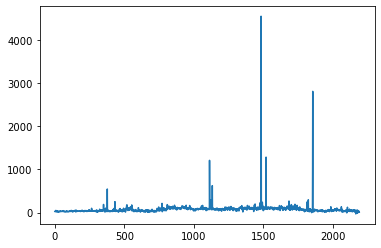

In [27]:
#Plot test dataset
plt.plot(testdataset)

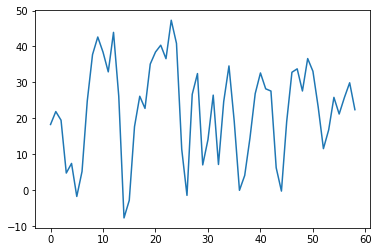

In [28]:
#Plot actual values of RRP
plt.plot(real_RRP)

In [29]:
predicted_RRP = rnn.predict(testing)
predicted_RRP = sc.inverse_transform(predicted_RRP)
predicted_RRP = np.reshape(predicted_RRP,(predicted_RRP.shape[1],predicted_RRP.shape[0]))

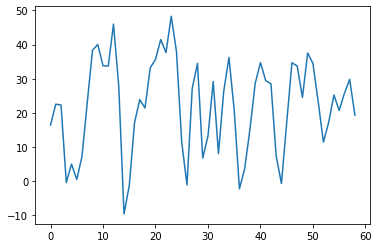

In [30]:
#Plot PREDICTED values of RRP
plt.plot(predicted_RRP)

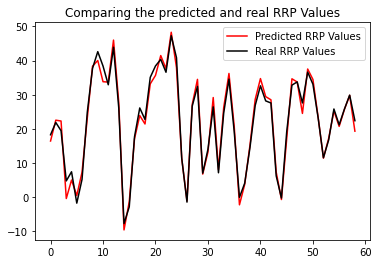

In [31]:
#Merge both plots in 1 graph 
plt.plot(predicted_RRP, color = 'red', label = "Predicted RRP Values")
plt.plot(real_RRP, color = 'black', label = "Real RRP Values")
plt.title('Comparing the predicted and real RRP Values')
plt.legend()
plt.show()

In [32]:
#Import performance metric libraries 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [33]:
#Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(real_RRP, predicted_RRP)
mae

1.4805000156622274

In [34]:
#Calculating the Mean Absolute Percentage Error (MAPE)
mean_absolute_percentage_error(real_RRP, predicted_RRP)

3.4613421957896637